**Etape1: importation des bibliothèques python**

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

**Etape2:importation des données et traitement des données**



In [ ]:
data = pd.read_csv("diabetes.csv")
data = data.drop(labels = ['Outcome'], axis=1)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [ ]:
#  Affichage des noms de  colonnes
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
# Affichage des informations sur les colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [ ]:
# nombre des individus x variables
data.shape

(768, 8)

In [ ]:
# Calculer les moyennes des colonnes
data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
dtype: float64

In [ ]:
# calculer les écart-types des variables
data.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
dtype: float64

**Etape3: normalisation des données**

In [ ]:
# Instancier un objet StandardScaler
scaler = StandardScaler()

# Adapter le scaler aux données et effectuer la normalisation
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# data_normalized contient maintenant les données normalisées prêtes pour l'ACP
data=data_normalized

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [ ]:
# tableau de Variance et covariance matrix
var_covar = data.cov()
var_covar

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.001304,0.129627,0.141466,-0.081778,-0.073630,0.017706,-0.033566,0.545051
Glucose,0.129627,1.001304,0.152789,0.057403,0.331789,0.221359,0.137516,0.263858
BloodPressure,0.141466,0.152789,1.001304,0.207641,0.089049,0.282173,0.041319,0.239840
SkinThickness,-0.081778,0.057403,0.207641,1.001304,0.437352,0.393085,0.184167,-0.114119
Insulin,-0.073630,0.331789,0.089049,0.437352,1.001304,0.198117,0.185312,-0.042218
BMI,0.017706,0.221359,0.282173,0.393085,0.198117,1.001304,0.140830,0.036289
DiabetesPedigreeFunction,-0.033566,0.137516,0.041319,0.184167,0.185312,0.140830,1.001304,0.033605
Age,0.545051,0.263858,0.239840,-0.114119,-0.042218,0.036289,0.033605,1.001304


In [ ]:
# tableau de corrélation
data.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Axes: >

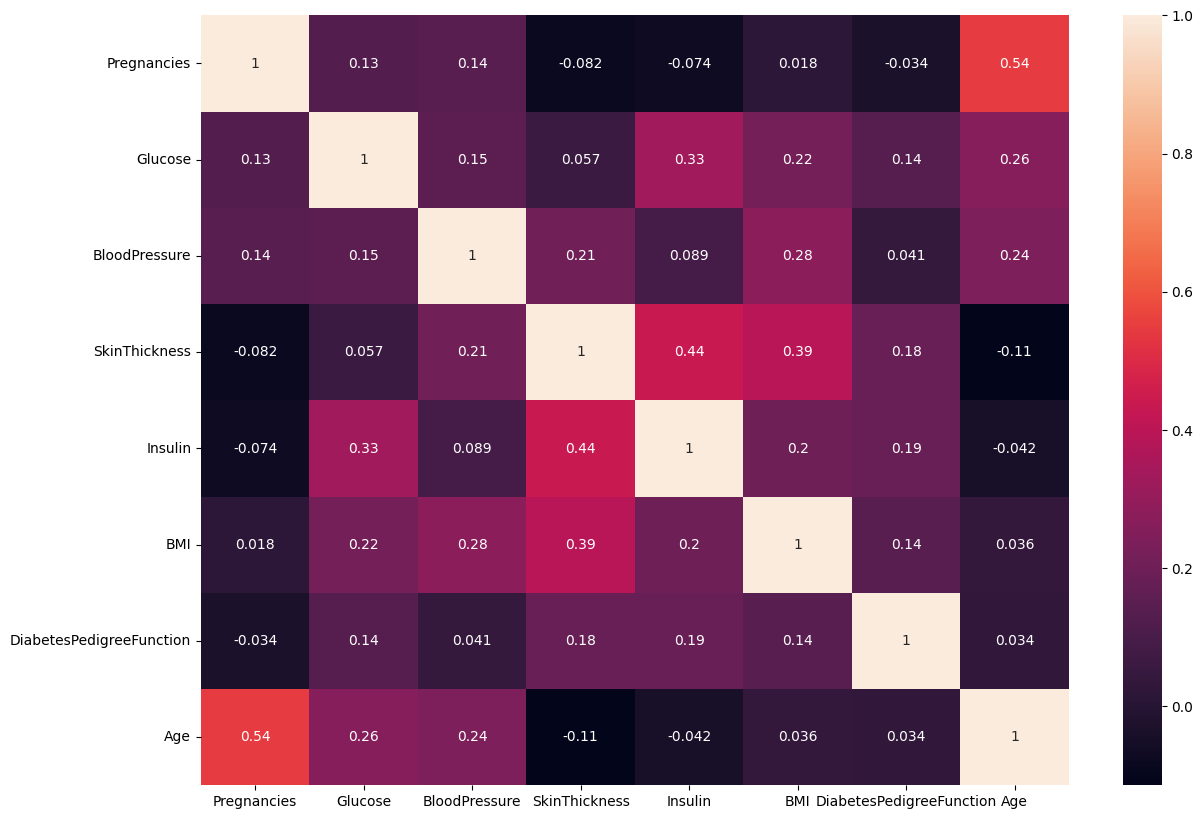

In [ ]:
plt.figure(figsize=(14,10))
corr = data.corr()
sns.heatmap(corr, annot = True)

**Etape4: calcul des valeurs propres**

In [ ]:
# calcul des valeurs propres
valeurs_propres = np.linalg.eigvals(data.corr())
# calcul de la trace de la matrice
trace=np.trace(data.cov())
labels = data.columns
valeurs_propres = pd.DataFrame()
labels

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
valeurs_propres["variables"] = labels
valeurs_propres["valeurs_propres"] = np.linalg.eigvals(data.cov())
valeurs_propres["variance ratio"] = valeurs_propres["valeurs_propres"] * 100 / trace
valeurs_propres


,variables,valeurs_propres,variance ratio
0,Pregnancies,2.097111,26.179749
1,Glucose,1.733467,21.640127
2,BloodPressure,0.420364,5.247702
3,SkinThickness,0.404989,5.055776
4,Insulin,0.683518,8.532855
5,BMI,0.763338,9.529305
6,DiabetesPedigreeFunction,0.876671,10.944113
7,Age,1.030972,12.870373


In [ ]:
trace=valeurs_propres["valeurs_propres"].sum()
trace

8.010430247718377

 **Etape 5:Application d'une acp**

In [ ]:
# initialiser l'acp
acp = PCA()
composantes_principales = acp.fit_transform(data)

# Calculer les ratios de variance expliquée
variance_ratio = acp.explained_variance_ratio_

# Calculer la somme cumulée des ratios de variance expliquée
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Trouver le nombre d'axes selon le pourcentage souhaité
pourcentage_souhaite = 0.8
nombre_axes = np.argmax(cumulative_variance_ratio >= pourcentage_souhaite) + 1

# Sélectionner les colonnes correspondantes dans le DataFrame des composantes principales
composantes_principales = composantes_principales[:, :nombre_axes]

# Renommer les colonnes
nouvelles_colonnes = [f'acp{i+1}' for i in range(nombre_axes)]
composantes_principales = pd.DataFrame(composantes_principales, columns=nouvelles_colonnes)
composantes_principales

,acp1,acp2,acp3,acp4,acp5
0,1.068503,1.234895,0.095930,0.496990,-0.109985
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507
2,-0.396477,1.595876,1.760678,-0.070395,0.906474
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060
4,2.359334,-2.184819,2.963107,4.033099,0.592684
...,...,...,...,...,...
763,1.562085,1.923150,-0.867408,-0.390926,-2.541527
764,-0.100405,-0.614181,-0.764353,-0.134859,0.499290
765,-0.283475,0.097065,-0.077192,-0.687561,-0.523009
766,-1.060324,0.837062,0.425030,-0.204493,0.957593


In [ ]:
vecteurpropre= pd.DataFrame()
principal_components = acp.components_
principal_components = principal_components[:, :9]
# affichage des vecteurs unitaires
for i, pc in enumerate(principal_components):
    st = "U" + str(i+1)
    vecteurpropre[st] = pc
vecteurpropre

,U1,U2,U3,U4,U5,U6,U7,U8
0,0.128432,0.593786,-0.013087,0.080691,-0.475606,0.193598,-0.588790,0.117841
1,0.393083,0.174029,0.467923,-0.404329,0.466328,0.094162,-0.060153,0.450355
2,0.360003,0.183892,-0.535494,0.055986,0.327953,-0.634116,-0.192118,-0.011296
3,0.439824,-0.331965,-0.237674,0.037976,-0.487862,0.009589,0.282213,0.566284
4,0.435026,-0.250781,0.336709,-0.349944,-0.346935,-0.270651,-0.132010,-0.548621
5,0.451941,-0.100960,-0.361865,0.053646,0.253204,0.685372,-0.035366,-0.341518
6,0.270611,-0.122069,0.433189,0.833680,0.119810,-0.085784,-0.086091,-0.008259
7,0.198027,0.620589,0.075248,0.071201,-0.109290,-0.033357,0.712085,-0.211662


In [ ]:
nc = [f'acp{i+1}' for i in range(2)]
composantes_principales = pd.DataFrame(composantes_principales, columns=nc)
composantes_principales

,acp1,acp2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819
...,...,...
763,1.562085,1.923150
764,-0.100405,-0.614181
765,-0.283475,0.097065
766,-1.060324,0.837062


**Etape 6:Présentation des graphiques cercle et nuage de points**

<ipython-input-61-09d837ffe08f>:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.arrow(0,


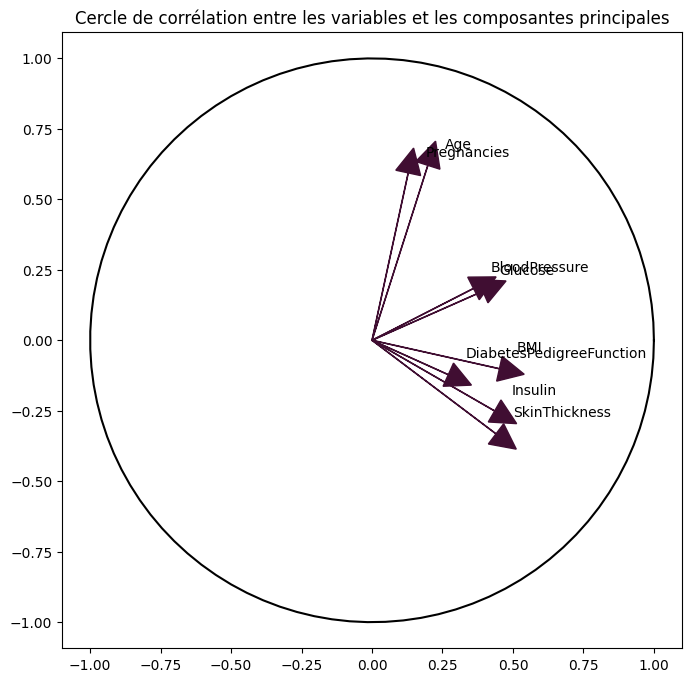

In [ ]:
# cercle de coorelation
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, acp.components_.shape[1]):
    ax.arrow(0,
             0,
            #  ajouter une flèche de l'origine vers la valeur de la variable sur l'axe 1 et axe 2
            #  1 acp2 0 acp 1
             acp.components_[0, i],
             acp.components_[1, i],
             head_width=0.09,
             head_length=0.09,
            edgecolor='#400E32',
             color='#400E32')  # Modifier la couleur du contour des flèches)

    plt.text(acp.components_[0, i] + 0.06,
             acp.components_[1, i] + 0.06,
             data.columns.values[i])

# Tracez un cercle de coorélation
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color='black')  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Cercle de corrélation entre les variables et les composantes principales')
plt.show()

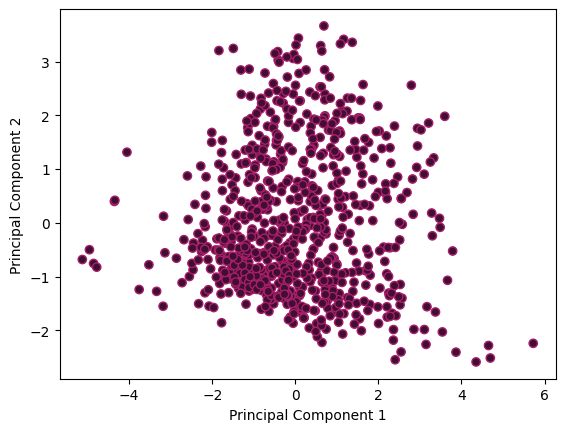

In [ ]:
# Couleurs pour les axes
couleur_x = '#400E32'
couleur_y = '#A61F69'

axe_x = 'acp1'
axe_y = 'acp2'
plt.scatter(composantes_principales[axe_x], composantes_principales[axe_y], c=[couleur_x] * len(composantes_principales), edgecolors=[couleur_y])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()